# Analisis Exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lectura de datos
df_resultados=pd.read_csv('./data_imputada/resultados.csv',sep=',')
df_resultados


,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,DETALLE OBSERVACI&OacuteN,IdModalidad,IdCarrera,AREA,Merito
0,300,"BOBADILLA DÍAZ, RUBÍ ALEJANDRA",DERECHO,1538.625,1.0,ALCANZO VACANTE,NaN,0,22,E,1
1,1928,"PAUCAR HUANACCHIRI, CARLOS ALBERTO",DERECHO,1471.875,2.0,ALCANZO VACANTE,NaN,0,22,E,2
2,2492,"SOLÍS PÉREZ, JOSÉ ANDRÉS",DERECHO,1450.750,4.0,ALCANZO VACANTE,NaN,0,22,E,3
3,1986,"PILLCO CALDERON, MAURO DANIEL",DERECHO,1450.750,5.0,ALCANZO VACANTE,NaN,0,22,E,4
4,781,"DIEGO MANZANILLA, ROMINA CAMILA",DERECHO,1450.750,3.0,ALCANZO VACANTE,NaN,0,22,E,5
...,...,...,...,...,...,...,...,...,...,...,...
17039,16989,"VALENCIA SUAREZ, GEMA LADY",INGENIERÍA DE SOFTWARE,239.500,NaN,NO INGRESO,NaN,0,202,C,821
17040,16251,"ALVAREZ ATAULLUCO, ELVIS THOMAS",INGENIERÍA DE SOFTWARE,232.750,NaN,NO INGRESO,NaN,0,202,C,822
17041,16281,"AUDANTE TRUJILLO, HECTOR JUNNIOR",INGENIERÍA DE SOFTWARE,226.000,NaN,NO INGRESO,NaN,0,202,C,823
17042,16709,"MENDOZA FERNANDEZ, JEAN CARLOS",INGENIERÍA DE SOFTWARE,212.750,NaN,NO INGRESO,NaN,0,202,C,824


In [3]:
df_carreras=pd.read_csv('./data_imputada/carreras.csv',sep=',')
df_carreras.head()

,IdCarrera,CARRERA,AREA
0,22,DERECHO,E
1,23,CIENCIA POLÍTICA,E
2,31,LITERATURA,E
3,33,FILOSOFÍA,E
4,34,LINGUÍSTICA,E


In [4]:
df_modalidad=pd.read_csv('./data_imputada/modalidad.csv',sep=',')
df_modalidad.head()

,id_modalidad,Modalidad
0,0,educación básica regular (ebr) y educación bás...


In [5]:
# Opteniendo la 5 carreras con mayor puntaje final
df_resultados_desnormalizada=pd.merge(df_resultados,df_carreras,how='left',on='IdCarrera')
df_resultados_desnormalizada

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,DETALLE OBSERVACI&OacuteN,IdModalidad,IdCarrera,AREA_x,Merito,CARRERA,AREA_y
0,300,"BOBADILLA DÍAZ, RUBÍ ALEJANDRA",DERECHO,1538.625,1.0,ALCANZO VACANTE,NaN,0,22,E,1,DERECHO,E
1,1928,"PAUCAR HUANACCHIRI, CARLOS ALBERTO",DERECHO,1471.875,2.0,ALCANZO VACANTE,NaN,0,22,E,2,DERECHO,E
2,2492,"SOLÍS PÉREZ, JOSÉ ANDRÉS",DERECHO,1450.750,4.0,ALCANZO VACANTE,NaN,0,22,E,3,DERECHO,E
3,1986,"PILLCO CALDERON, MAURO DANIEL",DERECHO,1450.750,5.0,ALCANZO VACANTE,NaN,0,22,E,4,DERECHO,E
4,781,"DIEGO MANZANILLA, ROMINA CAMILA",DERECHO,1450.750,3.0,ALCANZO VACANTE,NaN,0,22,E,5,DERECHO,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17039,16989,"VALENCIA SUAREZ, GEMA LADY",INGENIERÍA DE SOFTWARE,239.500,NaN,NO INGRESO,NaN,0,202,C,821,INGENIERÍA DE SOFTWARE,C
17040,16251,"ALVAREZ ATAULLUCO, ELVIS THOMAS",INGENIERÍA DE SOFTWARE,232.750,NaN,NO INGRESO,NaN,0,202,C,822,INGENIERÍA DE SOFTWARE,C
17041,16281,"AUDANTE TRUJILLO, HECTOR JUNNIOR",INGENIERÍA DE SOFTWARE,226.000,NaN,NO INGRESO,NaN,0,202,C,823,INGENIERÍA DE SOFTWARE,C
17042,16709,"MENDOZA FERNANDEZ, JEAN CARLOS",INGENIERÍA DE SOFTWARE,212.750,NaN,NO INGRESO,NaN,0,202,C,824,INGENIERÍA DE SOFTWARE,C


In [6]:
#top las 5 carreras con mayor canidad de postulantes
carreras_mayor_postulantes=df_resultados.groupby('ESCUELA PROFESIONAL')['ESCUELA PROFESIONAL','PUNTAJE FINAL'].count().sort_values(by='PUNTAJE FINAL',ascending=False).head(5)

/tmp/ipykernel_242/2637128110.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  carreras_mayor_postulantes=df_resultados.groupby('ESCUELA PROFESIONAL')['ESCUELA PROFESIONAL','PUNTAJE FINAL'].count().sort_values(by='PUNTAJE FINAL',ascending=False).head(5)


In [7]:
carreras_mayor_postulantes=carreras_mayor_postulantes.index

In [8]:
carreras_mayor_postulantes

Index(['DERECHO', 'INGENIERÍA DE SISTEMAS', 'INGENIERÍA INDUSTRIAL',
       'INGENIERÍA CIVIL', 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES'],
      dtype='object', name='ESCUELA PROFESIONAL')

In [9]:
df_trabajo=df_resultados_desnormalizada.copy()

In [10]:
df_trabajo=df_trabajo[df_trabajo['IdModalidad']==0]

In [11]:
df_top5=df_trabajo[df_trabajo['ESCUELA PROFESIONAL'].isin(carreras_mayor_postulantes)]

<Axes: xlabel='PUNTAJE FINAL', ylabel='CARRERA'>

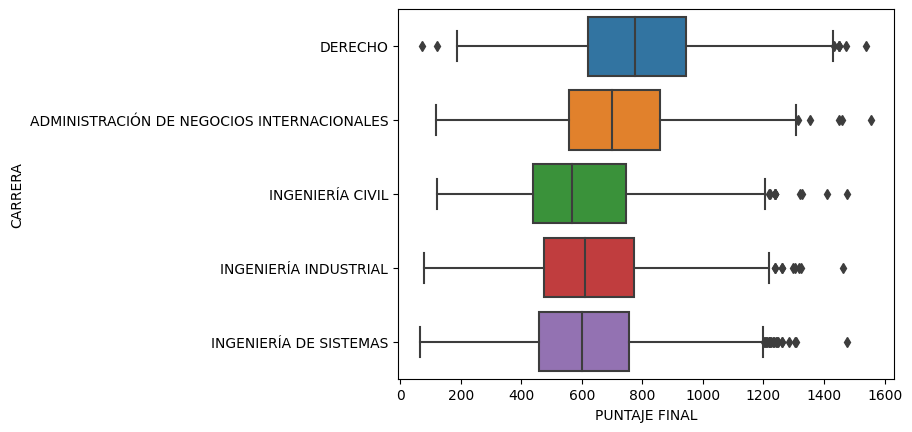

In [12]:
#promedio de los postulantes a las 5 carreras mas demandadas 
sns.boxplot(data=df_top5,x='PUNTAJE FINAL',y='CARRERA')

<Axes: xlabel='PUNTAJE FINAL', ylabel='CARRERA'>

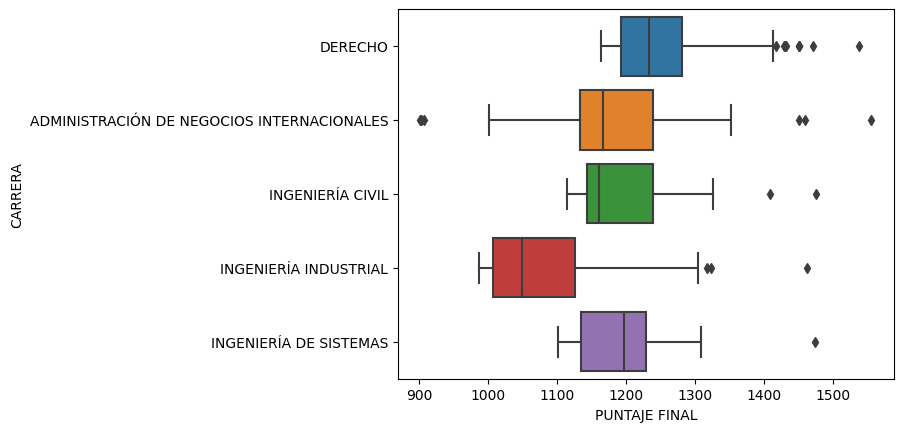

In [13]:
#promedio de los postulantes que INGRESARON a las 5 carreras mas demandadas 
sns.boxplot(data=df_top5[df_top5['OBSERVACIÓN']=='ALCANZO VACANTE'],x='PUNTAJE FINAL',y='CARRERA')

<Axes: xlabel='PUNTAJE FINAL', ylabel='AREA_x'>

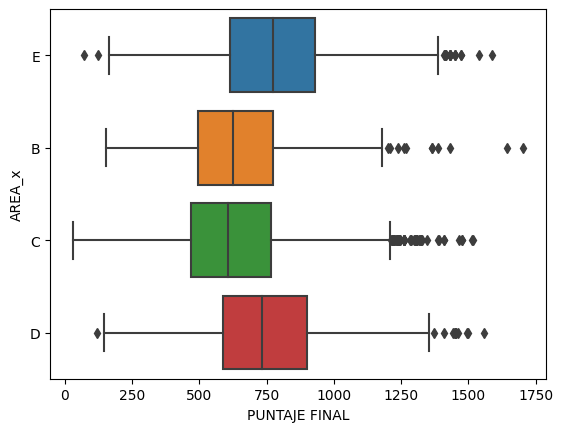

In [14]:
#analisis del puntaaje promedio por area
sns.boxplot(data=df_trabajo,x='PUNTAJE FINAL',y='AREA_x')

<Axes: xlabel='PUNTAJE FINAL', ylabel='AREA_x'>

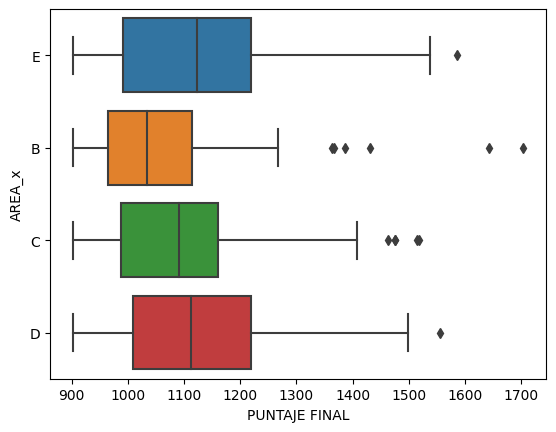

In [15]:
#promedio de notas de los ingresantes por area 
sns.boxplot(data=df_trabajo[df_trabajo['OBSERVACIÓN']=='ALCANZO VACANTE'],x='PUNTAJE FINAL',y='AREA_x')

In [16]:
#hallando las carreras con mayor puntaje en el examen de admision 
top5_max=df_trabajo.sort_values(by='PUNTAJE FINAL',ascending=False).head(15).drop_duplicates(subset='ESCUELA PROFESIONAL')
top5_max

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,DETALLE OBSERVACI&OacuteN,IdModalidad,IdCarrera,AREA_x,Merito,CARRERA,AREA_y
9495,9544,"SALAZAR SEDANO, JOAQUÍN SEBASTIÁN",COMPUTACIÓN CIENTÍFICA,1704.250,1.0,ALCANZO VACANTE,NaN,0,145,B,1,COMPUTACIÓN CIENTÍFICA,B
4775,4798,"MARTINEZ ENRIQUEZ, LUKA SEBASTIAN",QUÍMICA,1643.125,1.0,ALCANZO VACANTE,NaN,0,71,B,1,QUÍMICA,B
3375,3561,"DIAZ YAIPÉN, BRUNO",COMUNICACIÓN SOCIAL,1586.500,1.0,ALCANZO VACANTE,NaN,0,35,E,1,COMUNICACIÓN SOCIAL,E
6234,6727,"LOPEZ ESPINOZA, JUAN DIEGO",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,1556.375,1.0,ALCANZO VACANTE,NaN,0,93,D,1,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,D
0,300,"BOBADILLA DÍAZ, RUBÍ ALEJANDRA",DERECHO,1538.625,1.0,ALCANZO VACANTE,NaN,0,22,E,1,DERECHO,E
11810,12025,"SALCEDO CARMEN, SANDRA MICAELA",INGENIERÍA AMBIENTAL,1517.500,1.0,ALCANZO VACANTE,NaN,0,168,C,1,INGENIERÍA AMBIENTAL,C
14154,14155,"ACURIO SOLAR, MANUEL",INGENIERÍA BIOMÉDICA,1514.125,1.0,ALCANZO VACANTE,NaN,0,194,C,1,INGENIERÍA BIOMÉDICA,C
7706,8514,"ROMERO ZEGARRA, ANDREA KATRINA",ECONOMÍA,1498.625,1.0,ALCANZO VACANTE,NaN,0,121,D,1,ECONOMÍA,D
10744,11555,"RICALDI TANDAYPAN, RAFAEL LEONIDAS",INGENIERÍA CIVIL,1476.375,1.0,ALCANZO VACANTE,NaN,0,167,C,1,INGENIERÍA CIVIL,C
14453,15085,"GALINDO CASAS, LEONEL YAZID",INGENIERÍA DE SISTEMAS,1475.250,1.0,ALCANZO VACANTE,NaN,0,201,C,1,INGENIERÍA DE SISTEMAS,C


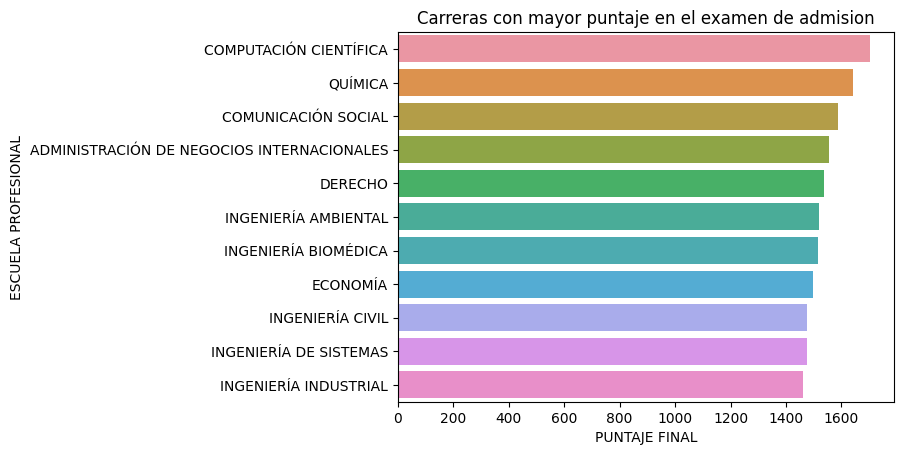

In [17]:
sns.barplot(data=top5_max,x='PUNTAJE FINAL',y='ESCUELA PROFESIONAL')
plt.title('Carreras con mayor puntaje en el examen de admision')
plt.show()

In [18]:
top5_max

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,DETALLE OBSERVACI&OacuteN,IdModalidad,IdCarrera,AREA_x,Merito,CARRERA,AREA_y
9495,9544,"SALAZAR SEDANO, JOAQUÍN SEBASTIÁN",COMPUTACIÓN CIENTÍFICA,1704.250,1.0,ALCANZO VACANTE,NaN,0,145,B,1,COMPUTACIÓN CIENTÍFICA,B
4775,4798,"MARTINEZ ENRIQUEZ, LUKA SEBASTIAN",QUÍMICA,1643.125,1.0,ALCANZO VACANTE,NaN,0,71,B,1,QUÍMICA,B
3375,3561,"DIAZ YAIPÉN, BRUNO",COMUNICACIÓN SOCIAL,1586.500,1.0,ALCANZO VACANTE,NaN,0,35,E,1,COMUNICACIÓN SOCIAL,E
6234,6727,"LOPEZ ESPINOZA, JUAN DIEGO",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,1556.375,1.0,ALCANZO VACANTE,NaN,0,93,D,1,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,D
0,300,"BOBADILLA DÍAZ, RUBÍ ALEJANDRA",DERECHO,1538.625,1.0,ALCANZO VACANTE,NaN,0,22,E,1,DERECHO,E
11810,12025,"SALCEDO CARMEN, SANDRA MICAELA",INGENIERÍA AMBIENTAL,1517.500,1.0,ALCANZO VACANTE,NaN,0,168,C,1,INGENIERÍA AMBIENTAL,C
14154,14155,"ACURIO SOLAR, MANUEL",INGENIERÍA BIOMÉDICA,1514.125,1.0,ALCANZO VACANTE,NaN,0,194,C,1,INGENIERÍA BIOMÉDICA,C
7706,8514,"ROMERO ZEGARRA, ANDREA KATRINA",ECONOMÍA,1498.625,1.0,ALCANZO VACANTE,NaN,0,121,D,1,ECONOMÍA,D
10744,11555,"RICALDI TANDAYPAN, RAFAEL LEONIDAS",INGENIERÍA CIVIL,1476.375,1.0,ALCANZO VACANTE,NaN,0,167,C,1,INGENIERÍA CIVIL,C
14453,15085,"GALINDO CASAS, LEONEL YAZID",INGENIERÍA DE SISTEMAS,1475.250,1.0,ALCANZO VACANTE,NaN,0,201,C,1,INGENIERÍA DE SISTEMAS,C


In [19]:
df_trabajo=df_trabajo[df_trabajo['OBSERVACIÓN']=='ALCANZO VACANTE']

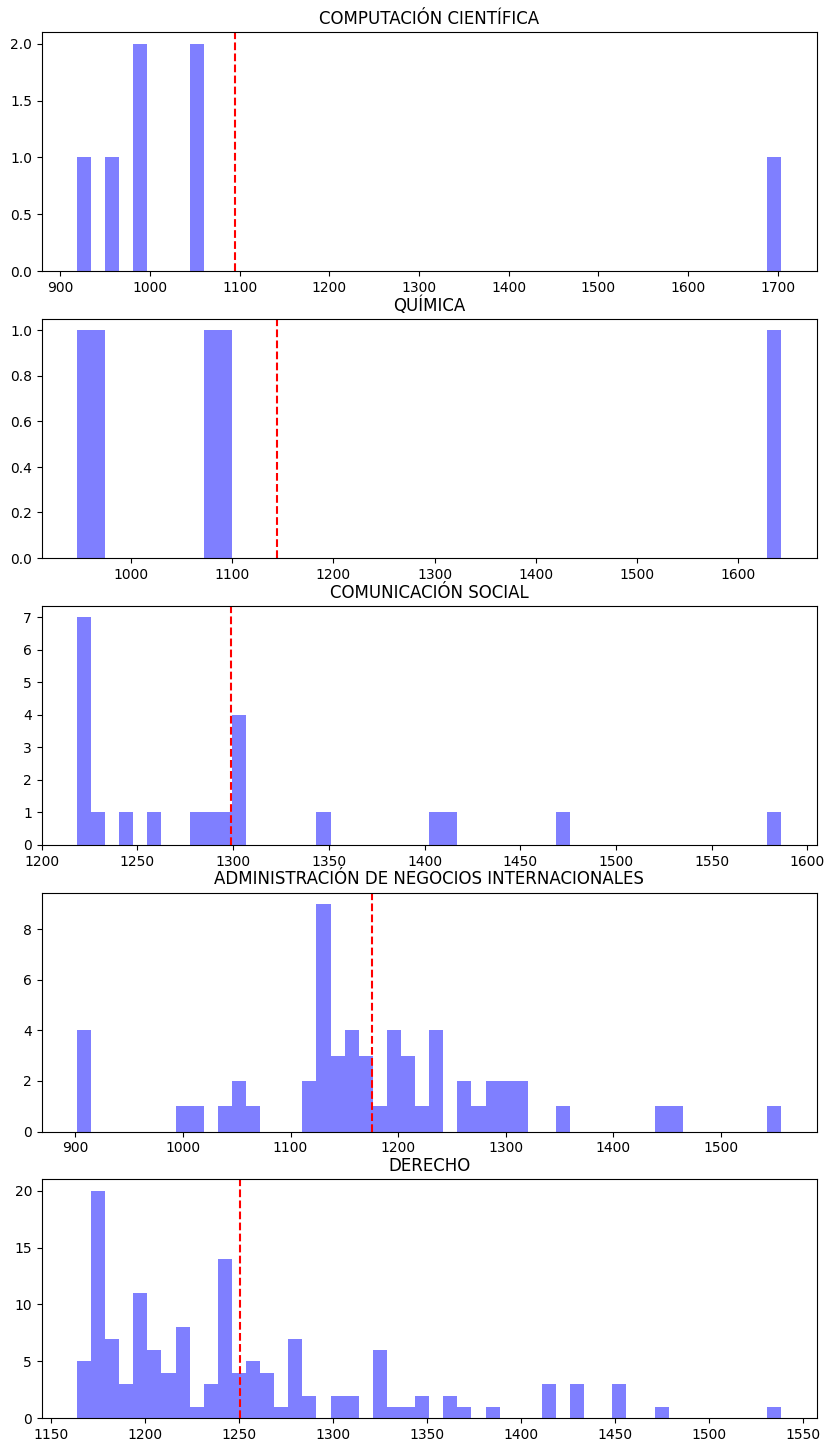

In [20]:
#tenemos que ver la distribucion de las carreras con mayor puntaje 
fig,axes=plt.subplots(5,figsize=(10,18))
for i in range(5):
    axes[i].hist(df_trabajo[df_trabajo['ESCUELA PROFESIONAL']==top5_max.iloc[i]['ESCUELA PROFESIONAL']]['PUNTAJE FINAL'],bins=50
                 ,color='blue',alpha=0.5)
    axes[i].set_title(top5_max.iloc[i]['ESCUELA PROFESIONAL'])
    axes[i].axvline(df_trabajo[df_trabajo['ESCUELA PROFESIONAL']==top5_max.iloc[i]['ESCUELA PROFESIONAL']]['PUNTAJE FINAL'].mean(), color='r', linestyle='--')


## buscando alumnos

In [21]:
df_resultados['ESCUELA PROFESIONAL'].unique()

array(['DERECHO', 'CIENCIA POLÍTICA', 'LITERATURA', 'FILOSOFÍA',
       'LINGUÍSTICA', 'COMUNICACIÓN SOCIAL', 'ARTE',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN', 'DANZA',
       'CONSERVACIÓN Y RESTAURACIÓN', 'EDUCACIÓN INICIAL',
       'EDUCACIÓN PRIMARIA', 'EDUCACIÓN SECUNDARIA', 'EDUCACIÓN FÍSICA',
       'QUÍMICA', 'INGENIERÍA QUÍMICA', 'INGENIERÍA AGROINDUSTRIAL',
       'ADMINISTRACIÓN', 'ADMINISTRACIÓN DE TURISMO',
       'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'ECONOMÍA', 'ECONOMÍA PÚBLICA',
       'ECONOMÍA INTERNACIONAL', 'FÍSICA',
       'INGENIERÍA MECÁNICA DE FLUIDOS', 'MATEMÁTICA', 'ESTADÍSTICA',
       'INVESTIGACIÓN OPERATIVA', 'COMPUTACIÓN CIENTÍFICA', 'HISTORIA',
       'SOCIOLOGÍA', 'ANTROPOLOGÍA', 'ARQUEOLOGÍA', 'TRABAJO SOCIAL',
       'GEOGRAFÍA', 'INGENIERÍA GEOLÓGICA', 'INGENIERÍA GEOGRÁFICA',
       'INGENIERÍA DE MINAS', 'INGENIERÍA METALÚRGICA',


In [22]:
df1=df_resultados[(df_resultados['ESCUELA PROFESIONAL']=='COMPUTACIÓN CIENTÍFICA') ]

In [24]:
df1.head()

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,DETALLE OBSERVACI&OacuteN,IdModalidad,IdCarrera,AREA,Merito
9495,9544,"SALAZAR SEDANO, JOAQUÍN SEBASTIÁN",COMPUTACIÓN CIENTÍFICA,1704.250,1.0,ALCANZO VACANTE,NaN,0,145,B,1
9496,9538,"REYES CÁCERES, ANGEL AARÓN",COMPUTACIÓN CIENTÍFICA,1050.500,2.0,ALCANZO VACANTE,NaN,0,145,B,2
9497,9501,"BARTOLO HUERE, EDSON JAVIER",COMPUTACIÓN CIENTÍFICA,1049.375,3.0,ALCANZO VACANTE,NaN,0,145,B,3
9498,9523,"LOPEZ BRAVO, CARLOS JESUS",COMPUTACIÓN CIENTÍFICA,987.125,4.0,ALCANZO VACANTE,NaN,0,145,B,4
9499,9522,"LLONTOP AZABACHE, BETZABET NOEMI",COMPUTACIÓN CIENTÍFICA,986.000,5.0,ALCANZO VACANTE,NaN,0,145,B,5
